![DSL_logo](dsl_logo.png)


# Advanced Text Analysis with Python

Welcome to the Digital Scholarship Lab introduction to Text Analysis with Python class. In this class we'll learn the basics of text analysis:

- Topic Modeling
- Text Similarity


This workshop assumes you've completed our Introduction to Text Analysis [workshop](https://brockdsl.github.io/Text_Analysis_with_Python/)

It would be useful to consult our Introduction to Python [Workshop](https://brockdsl.github.io/Intro_to_Python_Workshop/) for a basic introduction to the language. 


We'll use the Zoom's chat feature to interact.

Be sure to enable line numbers by looking for the 'gear' icon and checking the box in the 'Editor' panel.


[https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [1]:
#Import our Libraries


import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from gensim.utils import simple_preprocess
from gensim import corpora
from gensim import models

#Let's make sure our previews show more information
pd.set_option('display.max_colwidth', 999)

print("Done importing Librarians!")

/Users/tim/opt/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20;

[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Done importing Librarians!


/Users/tim/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Corpus

![winnie_splash](https://raw.githubusercontent.com/BrockDSL/Text_Analysis_with_Python/master/winnie_splash.png)

Corpus is a fancy way of saying the text that we will be looking at. Cleaning up a corpus and getting it ready for analysis is a big part of the process, once that is done the rest is easy. For our example we are going to be looking at some entries from the 1900 [diary](https://dr.library.brocku.ca/handle/10464/7282) of Winnie Beam. The next cell will load this corpus into a Pandas dataframe and show us a few entires. 

In [2]:
winnie_corpus = pd.read_csv('https://raw.githubusercontent.com/BrockDSL/Text_Analysis_with_Python/master/winnie_corpus.txt', header = None, delimiter="\t")
winnie_corpus.columns = ["page","date","entry"]
winnie_corpus['date'] = pd.to_datetime(winnie_corpus['date'])
winnie_corpus['entry'] = winnie_corpus.entry.astype(str)

#preview our top entries
winnie_corpus.head()

,page,date,entry
0,7,1900-01-01,"New Year. First day of 1900 Charlie Merritt died at Grand Forks British Columbia yesterday of typhoid fever. To-day is election day and pap went up about 3 o'clock and did not get back until nearly 10. He brought us some candy chocolate drops. We had a very fat goose for dinner, not a very young one. Had to have good teeth."
1,7,1900-01-02,"Went uptown in afternoon. Was up to Eckardt's but Miss Macfarlane was not there so I did not get what I wanted. Called at office and Nettie came home with me for tea. Mr Carman came over and borrowed my Mildred books. Then Leta came & borrowed my German Grammar as she forgot hers & left it at school before holiday. Papa, mamma, Nettie & I played crokinole. Mamma & I beat. The 2nd Contingent left for Toronto today to go to South Africa. Dr King's som went."
2,8,1900-01-03,"Mrs Trusty was here washing School started to-day, but I was not going this week. Mamma went to the church and then to Mrs Chatfields Took her the church books. The queen Street Baptist church had a service of praise this evening. Mrs Chapman is organist & Mrs Read-Muir sang Mrs George Armstrong has a daughter was born on New Year's day."
3,8,1900-01-04,"Went over to Carman's to have Ella go with me to Dunn's greenhouse. We went about half past three. I brought a primrose Miss Chaplin was in there. Mamma went to Mrs Klotz at home Beatrice helped. Papa & I went to Sunday School entertainment at night. Had a very long programme. There was a dialogue called ""Aunt Ketty's shopping which was good, and a shaving scene. Mr perry gave a tableful of prizes away. Beatrice came home with us. They had a drill of girls & they sang ""Soldiers of the Queen"""
4,9,1900-01-05,"Sweep day. I read ""At the Camerons"" in the ""Harper's Young People"" when mamma was sweeping. We had a beggar in afternoon asking for a few cents as he had a long way to go. Rats! Went over to Lee's in afternoon after eggs. Took a ""Young Ladies Journal"" Mrs Pay lent me. Her kitty has a sore tail. Mrs Malcolmson came after eggs when I was there. She got large sum of 2. Had some candy at night."


## Topic Modeling

In [3]:
texts = winnie_corpus["entry"].apply(simple_preprocess)

In [19]:
sample_entry = texts.sample()

In [4]:
#Change our documents into 'bags of words'

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)



In [20]:
#Generate Stopword list

stop_words = stopwords.words('english')


## Removing Stopwords
 
Not working that great

In [27]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
sample_entry = texts.sample()
for s in sample_entry:
    print(s)

['was', 'at', 'school', 'in', 'the', 'morning', 'sat', 'with', 'leta', 'papa', 'came', 'home', 'from', 'hamilton', 'last', 'night', 'practiced', 'in', 'afternoon', 'mamma', 'made', 'very', 'pretty', 'cushion', 'for', 'parlor', 'tapestry', 'front', 'and', 'brown', 'back', 'papa', 'brought', 'us', 'some', 'candy', 'at', 'night', 'he', 'bought', 'three', 'tickets', 'for', 'the', 'redpath', 'concert', 'co', 'that', 'is', 'to', 'be', 'here', 'on', 'tuesday', 'mr', 'read', 'mr', 'macgregor', 'are', 'bringing', 'them', 'here', 'wrote', 'letter', 'to', 'aunt', 'allie']


In [29]:
for s in sample_entry:
    if s not in stop_words:
        print(s)

['was', 'at', 'school', 'in', 'the', 'morning', 'sat', 'with', 'leta', 'papa', 'came', 'home', 'from', 'hamilton', 'last', 'night', 'practiced', 'in', 'afternoon', 'mamma', 'made', 'very', 'pretty', 'cushion', 'for', 'parlor', 'tapestry', 'front', 'and', 'brown', 'back', 'papa', 'brought', 'us', 'some', 'candy', 'at', 'night', 'he', 'bought', 'three', 'tickets', 'for', 'the', 'redpath', 'concert', 'co', 'that', 'is', 'to', 'be', 'here', 'on', 'tuesday', 'mr', 'read', 'mr', 'macgregor', 'are', 'bringing', 'them', 'here', 'wrote', 'letter', 'to', 'aunt', 'allie']


In [6]:
#Final Corpus generation

corpus = [dictionary.doc2bow(text) for text in texts if text not in stop_words]

## How many topics?

In [7]:
NUMBER_TOPICS = 10

In [8]:
#Construct our Model

lda_model = models.LdaModel(corpus=corpus,num_topics=NUMBER_TOPICS)

## Visualize our Model

In [9]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.006421 -0.002125       1        1  19.825326
2      0.011281  0.007156       2        1  15.093641
7      0.010146 -0.001292       3        1  14.142058
1      0.012597  0.005093       4        1  13.972001
3     -0.010929  0.009137       5        1  10.474952
5      0.015373  0.014760       6        1   9.990792
6      0.031156  0.002692       7        1   7.833230
0      0.039326 -0.016684       8        1   3.345271
4     -0.064182  0.048646       9        1   3.163982
9     -0.051189 -0.067383      10        1   2.158746, topic_info=        Term        Freq       Total Category  logprob  loglift
27        we  195.000000  195.000000  Default  30.0000  30.0000
13       had  246.000000  246.000000  Default  29.0000  29.0000
51        mr  238.000000  238.000000  Default  28.0000  28.0000
49        me  157.000000  157.000000  Default  27.0000  27.0000
45        it  198.000000  198.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
16        is    3.148053  190.554395  Topic10  -4.5753  -0.2675
194       by    2.668118  111.054342  Topic10  -4.7407   0.1070
0      about    2.488477   86.254609  Topic10  -4.8104   0.2900
50      miss    2.657275  126.126629  Topic10  -4.7447  -0.0243
140  morning    2.413853  136.234281  Topic10  -4.8408  -0.1975

[680 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.139123      about
0         2  0.115936      about
0         3  0.162310      about
0         4  0.139123      about
0         5  0.115936      about
...     ...       ...        ...
29       10  0.049117  yesterday
394       1  0.299594        you
394       4  0.299594        you
394       6  0.149797        you
394       8  0.149797        you

[2207 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 8, 2, 4, 6, 7, 1, 5, 10])

## But really, how many topics should we have?

In [10]:
cScore = models.CoherenceModel(model = lda_model, \
                               texts = texts, \
                               dictionary = dictionary, \
                               coherence = 'c_v'
                     )

In [11]:
cScore.get_coherence()

0.27939712527284255

## Plotting out Coherence Score

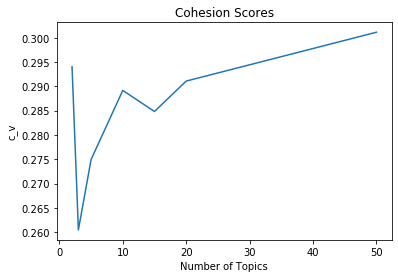

,num_topics,c_v
0,2,0.294020
1,3,0.260472
2,5,0.274927
3,10,0.289162
4,15,0.284823
5,20,0.291077
6,50,0.301119


In [12]:

#Choics of topics
TOPIC_CHOICES = [2,3,5,10,15,20,50]
COHERENCE_METHOD = 'c_v'

c_Scores = []
for t_number in TOPIC_CHOICES:
    lda_model_test = models.LdaModel(corpus=corpus,num_topics=t_number)
    cs = models.CoherenceModel(model = lda_model_test, \
                               texts = texts, \
                               dictionary = dictionary, \
                               coherence = COHERENCE_METHOD
                     )
    c_Scores.append(cs.get_coherence())
    
    
plt.plot(TOPIC_CHOICES, c_Scores)
plt.title("Cohesion Scores")
plt.ylabel(COHERENCE_METHOD)
plt.xlabel("Number of Topics")
plt.show()
    
cScore_df = pd.DataFrame(list(zip(TOPIC_CHOICES,c_Scores)))
cScore_df.columns = ["num_topics",COHERENCE_METHOD]
cScore_df.sort_values(by=COHERENCE_METHOD, ascending=False)
cScore_df

## Redoing

Let's redo the model and the visualization with the optimum number of topics found

In [15]:

perfect_topic_number = 20

lda_model = models.LdaModel(corpus=corpus,num_topics=perfect_topic_number)
vis = pyLDAvis.gensim_models.prepare(lda_model,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.023978  0.002626       1        1  14.081684
15     0.003878  0.009023       2        1  10.151546
13     0.011251 -0.044283       3        1  10.065818
5     -0.004060  0.011535       4        1   9.573815
6      0.002179  0.011610       5        1   8.582684
8      0.006415 -0.003624       6        1   7.492259
1      0.014570  0.062729       7        1   5.403312
2      0.038829  0.019897       8        1   5.008755
18     0.018126 -0.004664       9        1   4.809901
9      0.008312 -0.028228      10        1   4.742946
12     0.018816  0.012317      11        1   3.789336
4      0.005581  0.006340      12        1   3.696929
19     0.003268  0.023277      13        1   3.569289
11     0.056159 -0.086187      14        1   2.283496
3      0.033927  0.003414      15        1   2.085607
0     -0.046913  0.119106      16        1   1.295509
16    -0.013823 -0.025039      17        1   1.244988
14    -0.040828 -0.003368      18        1   0.803447
7      0.031104 -0.030740      19        1   0.783847
17    -0.170769 -0.055742      20        1   0.534836, topic_info=        Term        Freq       Total Category  logprob  loglift
39      came  208.000000  208.000000  Default  30.0000  30.0000
80        on  152.000000  152.000000  Default  29.0000  29.0000
27        we  200.000000  200.000000  Default  28.0000  28.0000
72    church  158.000000  158.000000  Default  27.0000  27.0000
15        he   78.000000   78.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
140  morning    1.103251  136.028648  Topic20  -4.2285   0.4164
62      then    1.032523  117.945868  Topic20  -4.2947   0.4927
101    night    1.094188  226.106991  Topic20  -4.2367  -0.1000
51        mr    1.087439  243.058116  Topic20  -4.2429  -0.1785
2    brought    0.847205   79.734463  Topic20  -4.4925   0.6865

[1314 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
554       1  0.095678  abbott
554       2  0.095678  abbott
554       4  0.095678  abbott
554       5  0.095678  abbott
554       6  0.095678  abbott
...     ...       ...     ...
30        6  0.061879   young
30        7  0.061879   young
30        9  0.061879   young
30       13  0.185637   young
30       15  0.123758   young

[4173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 16, 14, 6, 7, 9, 2, 3, 19, 10, 13, 5, 20, 12, 4, 1, 17, 15, 8, 18])

## What's in each Topic?

In [16]:
lda_model.print_topics()

[(0,
  '0.024*"52" + 0.020*"58" + 0.020*"196" + 0.019*"80" + 0.018*"45" + 0.018*"101" + 0.017*"39" + 0.015*"105" + 0.014*"51" + 0.014*"55"'),
 (1,
  '0.020*"19" + 0.019*"58" + 0.018*"39" + 0.017*"101" + 0.017*"45" + 0.017*"68" + 0.017*"27" + 0.016*"189" + 0.015*"21" + 0.014*"62"'),
 (2,
  '0.022*"39" + 0.022*"78" + 0.021*"55" + 0.020*"101" + 0.019*"14" + 0.019*"68" + 0.018*"19" + 0.018*"196" + 0.018*"13" + 0.017*"140"'),
 (3,
  '0.032*"16" + 0.019*"140" + 0.018*"57" + 0.018*"51" + 0.016*"45" + 0.015*"80" + 0.015*"68" + 0.014*"32" + 0.013*"63" + 0.013*"44"'),
 (4,
  '0.025*"13" + 0.020*"50" + 0.020*"194" + 0.019*"101" + 0.018*"160" + 0.018*"27" + 0.018*"78" + 0.017*"32" + 0.016*"51" + 0.016*"45"'),
 (5,
  '0.021*"39" + 0.019*"13" + 0.019*"52" + 0.019*"51" + 0.017*"44" + 0.016*"58" + 0.016*"88" + 0.016*"6" + 0.015*"33" + 0.013*"65"'),
 (6,
  '0.024*"27" + 0.020*"13" + 0.018*"49" + 0.017*"24" + 0.016*"39" + 0.015*"51" + 0.014*"44" + 0.014*"52" + 0.013*"55" + 0.013*"138"'),
 (7,
  '0.023*"

## Now What?